In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
import sqlite3

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
connection = sqlite3.connect('database.sqlite')
amazon_data = pd.read_sql_query('SELECT * from reviews where score != 3',connection)
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
def scorePosNeg(score):
    if(score<3):
        return 'negative'
    else:
        return 'positive'

In [4]:
score = amazon_data.Score
posneg = score.map(scorePosNeg)
amazon_data.Score = posneg
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
amazon_data.shape

(525814, 10)

# Exploratory Data Analysis
## Data Cleaning: Deduplication

In [6]:
#Sorting the data with ProductId
sorted_data = amazon_data.sort_values('ProductId',axis=0,ascending=True,inplace=False)

In [7]:
#Removing the data for reviews on similar products with same review
final_data = sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)

In [8]:
final_data.shape

(364173, 10)

In [9]:
#Removing the data where HelpfulnessNumerator > HelpfulnessDenominator
cleaned_data = final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]
cleaned_data.shape

(364171, 10)

In [10]:
cleaned_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [11]:
sort = cleaned_data.sort_values('Id',kind='quicksort',ascending = True)
sort[(sort.Id>=150450)&(sort.Id<=150550)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138675,150492,B000LQJKGS,ABFOAYZA2UHD3,J. Malnar,0,0,positive,1172016000,"just as with griotte, its a great filling",in a chockie coating that should be so much be...
138676,150493,0006641040,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",71,72,positive,1096416000,Read it once. Read it twice. Reading Chicken S...,"These days, when a person says, ""chicken soup""..."
138677,150494,0006641040,AYZ0PR5QZROD1,Mother of 3 girls,3,3,positive,1173312000,Family favorite,All of my children love this book. My first g...
138678,150496,0006641040,A3KKR87BJ0C595,"Gretchen Goodfellow ""Lover of children's lit""",3,3,positive,1111363200,"You'll use it once, you'll use it twice",One of my earliest memories is of this book. ...
138679,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,negative,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....
138680,150498,0006641040,A3SJWISOCP31TR,R. J. Wells,2,2,positive,1176336000,A Gem of a Book,This is a wonderful little book. I loved it 40...
138681,150499,0006641040,A3E7R866M94L0C,"L. Barker ""simienwolf""",2,2,positive,1065830400,Can't explain why,This book has been a favorite of mine since I ...
138682,150500,0006641040,A1IJKK6Q1GTEAY,A Customer,2,2,positive,1009324800,It Was a favorite!,This was a favorite book of mine when I was a ...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
138684,150502,0006641040,AVFMJ50HNO21J,Jane Doe,1,1,positive,1324944000,"Tiny little book, Wonderful little rhymes.",This copy is smaller than I expected (mostly b...


In [12]:
#Removing the reviews for book products
cleaned_data = sort.drop(sort.index[(sort.Id>=150493)&(sort.Id<=150529)])
cleaned_data[(cleaned_data.Id>=150450)&(cleaned_data.Id<=150650)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138675,150492,B000LQJKGS,ABFOAYZA2UHD3,J. Malnar,0,0,positive,1172016000,"just as with griotte, its a great filling",in a chockie coating that should be so much be...
138710,150530,B000VHI0MC,A3OTW5NH8GHL8X,"Oracle-Ace ""oracle-ace""",4,4,positive,1181088000,The Best Oats That I Have Found (and I've trie...,This is a great tasting oat product. I combine...
138711,150531,B000VHI0MC,A1IN5OPG8SW8Q7,"Frecie Magdirila ""F""",2,2,positive,1259539200,I LOVE THIS OATMEAL,"I usually hate oatmeal, but I love Bob's Red M..."
138712,150532,B000VHI0MC,A1QK0XCAPHIW1L,Flush Barrett-Browning,2,2,positive,1235865600,As good as it gets....,Bob's Oats are as good as oats get. I use the...
138713,150533,B000VHI0MC,A12QCF4W5ICU8G,M. Golden,1,1,negative,1319932800,overpriced,I just checked at Publix and it is $4.99 there...
138714,150534,B000VHI0MC,A1L7N67449CMER,Joann Goldberg,1,1,positive,1259280000,BEST OATS EVER,"LOOK NO FURTHER IF YOU WANT THE BEST TASTE, BE..."
138715,150535,B000VHI0MC,A1RMBE0PZQGAM,"Karl Langer ""Karl""",3,4,positive,1222819200,VERY good,"As chewy as steel-cut oats, but the texture is..."
138716,150536,B000VHI0MC,A3U1W0WBKZQRY5,Caroline Graettinger,0,0,positive,1318204800,My favorite breakfast,My husband and I love Bob's Red Mill extra thi...
138717,150537,B000VHI0MC,A2VE8DHZ2CFID,M. Muncie,0,0,positive,1268352000,MEM,I am not a big fan of oatmeal. This is the exc...
138718,150538,B000VHI0MC,A1SN1VBO9D7OLY,S. Goldsbury,1,19,negative,1254873600,Gluten free caution,Be careful when you are in Amazon's gluten fre...


In [13]:
cleaned_data.shape

(364137, 10)

# Text Preprocessing: Stemming, Lemmatization, StopWords

In [14]:
#Importing the required modules for Text Preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
#Set of all Stop Words in English
stop = set(stopwords.words('english'))
print(stop)

{'their', "that'll", 'don', 'y', 'does', 'before', "aren't", 'had', "hadn't", 'how', 'you', 'if', 'out', 'd', "wasn't", 'now', "haven't", 'theirs', 'again', 'ma', "needn't", "shouldn't", 'did', "mustn't", 'just', 'or', 'who', 'was', 'to', 'having', "hasn't", 'off', 'itself', 'very', "you've", 'isn', 'aren', "won't", 'be', 'after', 'then', 'that', 'have', 'once', 'no', 'should', 'by', 'your', 'o', 'herself', 'there', 'here', 'most', 'whom', "didn't", 'me', 'both', 'his', 'until', "doesn't", 'yourselves', 'yours', 'more', 'with', 'do', 'some', 'because', 'she', 'from', 'needn', 'him', 'themselves', 'which', 'a', 'when', 'all', 'not', 'has', "should've", 'these', 'those', 'he', 'nor', 'hasn', 'didn', 'about', 's', "you're", 'shan', 'up', 'myself', 'against', 'and', 'any', 'same', 'below', 'mightn', 'our', "it's", 'its', 'doing', "she's", 'it', 'where', 'are', 'i', 'what', 'only', 'for', 'further', 'of', 'wasn', 've', 'the', 'such', "you'd", 'doesn', 'is', 'they', 'will', 'shouldn', 'hadn'

In [16]:
#Building the SnowballStemmer
sno_stem = SnowballStemmer('english')
sno_stem.stem('helpful')

'help'

In [2]:
import re
#Removing Html tags
def cleanHtml(sentence):
    cleanText = re.sub('<.*?>','',sentence)
    return cleanText
#Removing Punctuations
def cleanPunc(word):
    cleaned = re.sub(r'[#|!|?|\'|@|"]','',word)
    cleaned = re.sub(r'[,|.|(|)|\|/]',' ',word)
    return cleaned

In [18]:
#Actual Preprocessing
stemmed_word = ''
i = 0
str1 = ' '
final_string=[]
all_positive_words=[]
all_negative_words=[]
stemmed_word=''
for sentence in cleaned_data.Text.values:     
    filtered_sentence=[]                    #Values to be stored after filtering
    sent = cleanHtml(sentence)              #Cleaning the html tags from the reviews
    for word in sent.split():           #Looping on each word of the sentence
        for cleaned_word in cleanPunc(word).split():        #Removing any punctuations
            if((cleaned_word.isalpha()) & (len(cleaned_word)>2)):   
                if(cleaned_word.lower() not in stop):
                    stemmed_word = (sno_stem.stem(cleaned_word.lower())).encode('utf8')    #Converting to lowercase 
                    filtered_sentence.append(stemmed_word)             
                    if (cleaned_data.Score.values)[i] == 'positive':
                        all_positive_words.append(stemmed_word)                #Inserting all the positive reviews
                    if (cleaned_data.Score.values)[i] == 'negative':
                        all_negative_words.append(stemmed_word)                #Inserting all the negative reviews
                else:
                    continue
            else:
                continue
    str1 = b" ".join(filtered_sentence)             #Converting to binary string format
    final_string.append(str1)
    i=i+1

In [19]:
cleaned_data['CleanedText'] = final_string

In [20]:
#Saving data to a new csv file
cleaned_data.to_csv('final_data.csv',index=False)

In [3]:
#Loading the data for all future uses
cleaned_data = pd.read_csv('final_data.csv')
cleaned_data = cleaned_data.drop([31393,294985,341395])    #Dropping these rows as they contain no cleaned text

### Sorting data as per timestamps

In [5]:
#Sorting the data as per TimeStamp
balanced_sorted_data =  cleaned_data.sort_values(by='Time',kind='quicksort',ascending=True,axis=0,inplace=False).reset_index(drop=True)
balanced_sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth act spe...
1,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
2,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...
3,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi collect fill comedi action wha...
4,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy movi funni entertain hesit pick ...


In [7]:
balanced_data_score = balanced_sorted_data[0:100000].Score
balanced_data_score.shape

(100000,)

In [8]:
balanced_data_score.value_counts()

positive    87726
negative    12274
Name: Score, dtype: int64

In [16]:
balanced_sorted_data = balanced_sorted_data.drop(columns='Score')

In [17]:
#Taking first 100k rows as train and test data from sorted data as per timestamps
balanced_train_data = balanced_sorted_data.iloc[0:70000,:]
balanced_train_label = balanced_data_score[0:70000]
balanced_test_data = balanced_sorted_data.iloc[0:30000,:]
balanced_test_label = balanced_data_score[0:30000]

# Bag Of Words (BOW) with BernoulliNB

In [22]:
#Building the vectorizer on train data
from sklearn.feature_extraction.text import CountVectorizer
bow_model = CountVectorizer()
bow_train_data = bow_model.fit_transform(balanced_train_data.CleanedText.values)
bow_train_data.shape

(70000, 32552)

In [23]:
#Transforming the test data
bow_test_data = bow_model.transform(balanced_test_data.CleanedText.values)
bow_test_data.shape

(30000, 32552)

In [24]:
#Applying Naive Bayes
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import BernoulliNB
list_vals = list(range(1,10**3))
alphas = list(filter(lambda x:x%50==0,list_vals))
alphas.insert(0, 1)
cv_scores=[]
for i in alphas:
    nb_classifier = BernoulliNB(alpha=i)
    scores = cross_val_score(nb_classifier,bow_train_data,balanced_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_alpha = alphas[MSE.index(min(MSE))] 
optimal_alpha

1

In [25]:
print("The optimal alpha found from 10 fold cross validation is --->"+str(optimal_alpha))

The optimal alpha found from 10 fold cross validation is --->1


In [26]:
#Training model with optimal alpha
from sklearn.metrics import accuracy_score
bow_nb = BernoulliNB(optimal_alpha)
bow_nb.fit(bow_train_data,balanced_train_label)
bow_nb_labels = bow_nb.predict(bow_test_data)

In [27]:
#Finding the accuracy of test data
score = accuracy_score(bow_nb_labels,balanced_test_label)*float(100)
print("The accuracy score for test data in Bag Of Words model is ---> "+str(score))

The accuracy score for test data in Bag Of Words model is ---> 90.79


In [28]:
#Checking accuracy for train data
bow_nb_trainl = bow_nb.predict(bow_train_data)
score_t = accuracy_score(bow_nb_trainl,balanced_train_label)*float(100)
print("The accuracy score for train data in Bag Of Words model is ---> "+str(score_t))

The accuracy score for train data in Bag Of Words model is ---> 90.36285714285714


In [29]:
#Feature importance for the model
negative_prob_sort = bow_nb.feature_log_prob_[0,:].argsort()[::-1]
positive_prob_sort = bow_nb.feature_log_prob_[1,:].argsort()[::-1]
#Finding the top 10 most used words in positive and negative class
neg_most_used = np.take(bow_model.get_feature_names(),negative_prob_sort[:10])
pos_most_used = np.take(bow_model.get_feature_names(),positive_prob_sort[:10])

In [30]:
neg_most_used

array(['tast', 'like', 'product', 'one', 'would', 'tri', 'good', 'flavor',
       'buy', 'get'], dtype='<U36')

In [31]:
pos_most_used

array(['tast', 'like', 'great', 'good', 'love', 'flavor', 'one', 'use',
       'tri', 'product'], dtype='<U36')

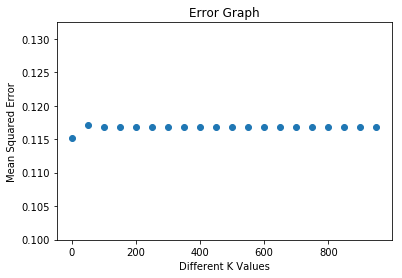

In [32]:
#Error graph for each alphas
plt.scatter(alphas,MSE)
plt.xlabel('Different K Values')
plt.ylabel('Mean Squared Error')
plt.title('Error Graph')
plt.show()

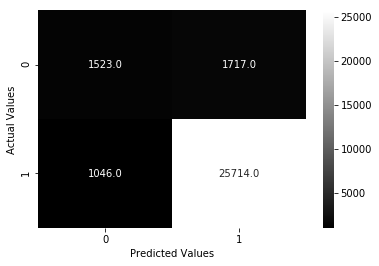

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_bow = confusion_matrix(balanced_test_label,bow_nb_labels)
sns.heatmap(cnf_bow,annot=True,cmap=plt.cm.gray,fmt=".1f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [34]:
#Finding the tnr,fnr,fpr,tpr values
tnr = cnf_bow[0,0]
fpr = cnf_bow[0,1]
fnr = cnf_bow[1,0]
tpr = cnf_bow[1,1]
print("The True Negative rate is "+str(tnr))
print("The False Positive rate is "+str(fpr))
print("The False Negative rate is "+str(fnr))
print("The True Positive rate is "+str(tpr))

The True Negative rate is 1523
The False Positive rate is 1717
The False Negative rate is 1046
The True Positive rate is 25714


In [35]:
#Finding the precision recall values
precision_bow = tpr/(fpr+tpr)
recall_bow = tpr/(fnr+tpr)
print("The Precision for Bag of words model is "+str(precision_bow))
print("The Recall for Bag of words model is "+str(recall_bow))

The Precision for Bag of words model is 0.9374065837920601
The Recall for Bag of words model is 0.9609118086696562


In [36]:
#Finding the F1 Score
f1_score_bow = (2*precision_bow*recall_bow)/(precision_bow+recall_bow)
print("The F1 score for Bag of Words model is "+str(f1_score_bow))

The F1 score for Bag of Words model is 0.9490136738572826


# Conclusion
### 1. Bernoulli Naive Bayes Model with Bag of Words predicted 27237 times correctly out of 30000 times
### 2. Accuracy of the model is 90.79%

# TF-IDF Model with BernoulliNB

In [37]:
#Building the TfidfVectorizer with train data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_train_data = tfidf_model.fit_transform(balanced_train_data.CleanedText.values)
tfidf_train_data.shape

(70000, 32552)

In [38]:
#Transforming the test data
tfidf_test_data = tfidf_model.transform(balanced_test_data.CleanedText.values)
tfidf_test_data.shape

(30000, 32552)

In [39]:
#Performing 10-fold cross validation
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import BernoulliNB
list_vals = list(range(1,10**3))
alphas_tfidf = list(filter(lambda x:x%50==0,list_vals))
alphas_tfidf.insert(0,1)
cv_scores = []
for i in alphas_tfidf:
    nb_classifier = BernoulliNB(alpha=i)
    scores = cross_val_score(nb_classifier,tfidf_train_data,balanced_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_alpha_tfidf = alphas_tfidf[MSE.index(min(MSE))]
optimal_alpha_tfidf

1

In [40]:
print("The optimal alpha for TfidfVectorizer is ----> "+str(optimal_alpha_tfidf))

The optimal alpha for TfidfVectorizer is ----> 1


In [41]:
#Training the model with optimal alpha
tfidf_nb = BernoulliNB(alpha=optimal_alpha_tfidf)
tfidf_nb.fit(tfidf_train_data,balanced_train_label)
tfidf_predicted_vals = tfidf_nb.predict(tfidf_test_data)

In [42]:
#Finding the accuracy with test data
from sklearn.metrics import accuracy_score
score_tfidf_test = accuracy_score(balanced_test_label,tfidf_predicted_vals)*float(100)
print("The accuracy score with test data is "+str(score_tfidf_test))

The accuracy score with test data is 90.79


In [43]:
#Finding the accuracy with train data
tfidf_pred = tfidf_nb.predict(tfidf_train_data)
score_tfidf_train = accuracy_score(balanced_train_label,tfidf_pred)*float(100)
print("The accuracy score with train data is "+str(score_tfidf_train))

The accuracy score with train data is 90.36285714285714


In [44]:
#Feature importance for the model
negative_prob_sort = tfidf_nb.feature_log_prob_[0,:].argsort()[::-1]
positive_prob_sort = tfidf_nb.feature_log_prob_[1,:].argsort()[::-1]
#Finding the top 10 most used words in positive and negative class
neg_most_used = np.take(tfidf_model.get_feature_names(),negative_prob_sort[:10])
pos_most_used = np.take(tfidf_model.get_feature_names(),positive_prob_sort[:10])

In [45]:
neg_most_used

array(['tast', 'like', 'product', 'one', 'would', 'tri', 'good', 'flavor',
       'buy', 'get'], dtype='<U36')

In [46]:
pos_most_used

array(['tast', 'like', 'great', 'good', 'love', 'flavor', 'one', 'use',
       'tri', 'product'], dtype='<U36')

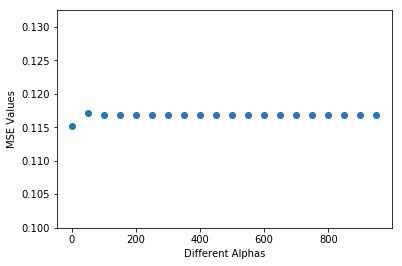

In [47]:
#Error graph for each alphas
plt.scatter(alphas_tfidf,MSE)
plt.xlabel('Different Alphas')
plt.ylabel('MSE Values')
plt.show()

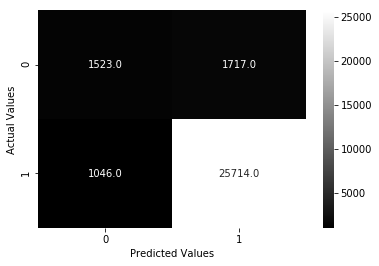

In [48]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_tfidf = confusion_matrix(balanced_test_label,tfidf_predicted_vals)
sns.heatmap(cnf_tfidf,annot=True,cmap = plt.cm.gray,fmt=".1f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [49]:
#Finding the tnr,fnr,fpr,tpr
tnr_tfidf = cnf_tfidf[0,0]
fpr_tfidf = cnf_tfidf[0,1]
fnr_tfidf = cnf_tfidf[1,0]
tpr_tfidf = cnf_tfidf[1,1]
print("The True Negative rate is "+str(tnr_tfidf))
print("The False Positive rate is "+str(fpr_tfidf))
print("The False Negative rate is "+str(fnr_tfidf))
print("The True Positive rate is "+str(tpr_tfidf))

The True Negative rate is 1523
The False Positive rate is 1717
The False Negative rate is 1046
The True Positive rate is 25714


In [50]:
#Finding the precision,recall of the model
precision_tfidf = tpr_tfidf/(tpr_tfidf+fpr_tfidf)
recall_tfidf = tpr_tfidf/(fnr_tfidf+tpr_tfidf)
print("The precision of Tfidf Model is "+str(precision_tfidf))
print("The recall of Tfidf Model is "+str(recall_tfidf))

The precision of Tfidf Model is 0.9374065837920601
The recall of Tfidf Model is 0.9609118086696562


In [51]:
#Calculating the F1 Score
f1_score_tfidf = (2*precision_tfidf*recall_tfidf)/(precision_tfidf+recall_tfidf)
print("The F1 Score of Tfidf Model is "+str(f1_score_tfidf))

The F1 Score of Tfidf Model is 0.9490136738572826


# Conclusion
### 1. Bernoulli Naive Bayes model with Tfidf Vectorizer predicted 27237 times correctly out of 30000 times
### 2. Accuracy of the model is 90.79%

# Bag Of Words (BOW) with MultinomialNB

In [52]:
#Applying 10-fold CV with MultinomialNB on already Vectorized data
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
list_vals = list(range(1,10**3))
alphas_multi = list(filter(lambda x:x%50==0,list_vals))
alphas_multi.insert(0, 1)
cv_scores=[]
for i in alphas_multi:
    nb_classifier = MultinomialNB(alpha=i)
    scores = cross_val_score(nb_classifier,bow_train_data,balanced_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_alpha_multi = alphas[MSE.index(min(MSE))] 
optimal_alpha_multi

1

In [53]:
#Training the model with optimal alpha
bow_nb_multi = MultinomialNB(alpha=optimal_alpha_multi)
bow_nb_multi.fit(bow_train_data,balanced_train_label)
bow_nb_multi_labels = bow_nb_multi.predict(bow_test_data)

In [54]:
#Finding the accuracy of test data
score_bow_multi = accuracy_score(bow_nb_multi_labels,balanced_test_label)*float(100)
print("The accuracy score for test data in Bag Of Words model is ---> "+str(score_bow_multi))

The accuracy score for test data in Bag Of Words model is ---> 92.74


In [55]:
#Finding the accuracy for train data
bow_nb_multi_tlabels = bow_nb_multi.predict(bow_train_data)
score_bow_multi_train = accuracy_score(bow_nb_multi_tlabels,balanced_train_label)*float(100)
print("The accuracy score for test data in Bag Of Words model is ---> "+str(score_bow_multi_train))

The accuracy score for test data in Bag Of Words model is ---> 92.40142857142857


In [56]:
#Feature importance for the model
negative_prob_sort = bow_nb_multi.feature_log_prob_[0,:].argsort()[::-1]
positive_prob_sort = bow_nb_multi.feature_log_prob_[1,:].argsort()[::-1]
#Finding the top 10 most used words in positive and negative class
neg_most_used = np.take(bow_model.get_feature_names(),negative_prob_sort[:10])
pos_most_used = np.take(bow_model.get_feature_names(),positive_prob_sort[:10])

In [57]:
neg_most_used

array(['tast', 'like', 'product', 'one', 'flavor', 'tri', 'would', 'good',
       'use', 'get'], dtype='<U36')

In [58]:
pos_most_used

array(['like', 'tast', 'tea', 'good', 'flavor', 'great', 'love', 'use',
       'one', 'product'], dtype='<U36')

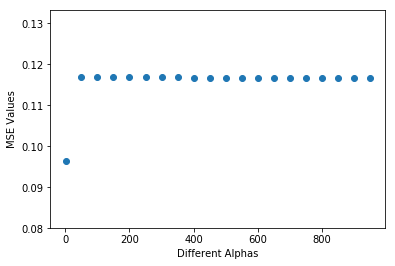

In [59]:
#Error graph for each alphas
plt.scatter(alphas_multi,MSE)
plt.xlabel('Different Alphas')
plt.ylabel('MSE Values')
plt.show()

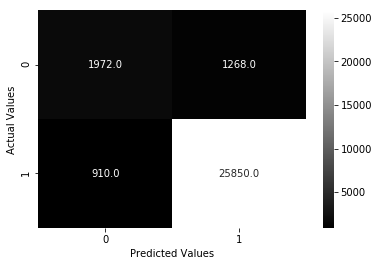

In [60]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_bow_multi = confusion_matrix(balanced_test_label,bow_nb_multi_labels)
sns.heatmap(cnf_bow_multi,annot=True,cmap = plt.cm.gray,fmt=".1f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [61]:
#Finding the tnr,fnr,fpr,tpr
tnr_bow_multi = cnf_bow_multi[0,0]
fpr_bow_multi = cnf_bow_multi[0,1]
fnr_bow_multi = cnf_bow_multi[1,0]
tpr_bow_multi = cnf_bow_multi[1,1]
print("The True Negative rate is "+str(tnr_bow_multi))
print("The False Positive rate is "+str(fpr_bow_multi))
print("The False Negative rate is "+str(fnr_bow_multi))
print("The True Positive rate is "+str(tpr_bow_multi))

The True Negative rate is 1972
The False Positive rate is 1268
The False Negative rate is 910
The True Positive rate is 25850


In [62]:
#Finding the precision,recall of the model
precision_bow_multi = tpr_bow_multi/(tpr_bow_multi+fpr_bow_multi)
recall_bow_multi = tpr_bow_multi/(fnr_bow_multi+tpr_bow_multi)
print("The precision of Tfidf Model is "+str(precision_bow_multi))
print("The recall of Tfidf Model is "+str(recall_bow_multi))

The precision of Tfidf Model is 0.9532413894830002
The recall of Tfidf Model is 0.9659940209267563


In [63]:
#Calculating the F1 Score
f1_score_bow_multi = (2*precision_bow_multi*recall_bow_multi)/(precision_bow_multi+recall_bow_multi)
print("The F1 Score of Tfidf Model is "+str(f1_score_bow_multi))

The F1 Score of Tfidf Model is 0.9595753368721928


# Conclusion
### 1. Multinomial Naive Bayes Model with Bag of Words predicted 27882 times correctly out of 30000 times
### 2. Accuracy of the model is 92.74%

# TF-IDF Model with MultinomialNB


In [64]:
#Applying 10-fold CV with MultinomialNB on already Vectorized data
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
list_vals = list(range(1,10**3))
alphas_tfidf_multi = list(filter(lambda x:x%50==0,list_vals))
alphas_tfidf_multi.insert(0,1)
cv_scores = []
for i in alphas_tfidf_multi:
    nb_classifier = MultinomialNB(alpha=i)
    scores = cross_val_score(nb_classifier,tfidf_train_data,balanced_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_alpha_tfidf_multi = alphas_tfidf_multi[MSE.index(min(MSE))]
optimal_alpha_tfidf_multi

1

In [65]:
print("The optimal alpha for TfidfVectorizer is ----> "+str(optimal_alpha_tfidf_multi))

The optimal alpha for TfidfVectorizer is ----> 1


In [66]:
#Training the model with optimal alpha
tfidf_nb_multi = MultinomialNB(alpha=optimal_alpha_tfidf_multi)
tfidf_nb_multi.fit(tfidf_train_data,balanced_train_label)
tfidf_predicted_vals_multi = tfidf_nb_multi.predict(tfidf_test_data)

In [67]:
#Finding the accuracy with test data
score_tfidf_test_multi = accuracy_score(balanced_test_label,tfidf_predicted_vals_multi)*float(100)
print("The accuracy score with test data is "+str(score_tfidf_test_multi))

The accuracy score with test data is 89.38666666666667


In [68]:
#Finding the accuracy with train data
tfidf_pred_train = tfidf_nb_multi.predict(tfidf_train_data)
score_tfidf_train_multi = accuracy_score(balanced_train_label,tfidf_pred_train)*float(100)
print("The accuracy score with train data is "+str(score_tfidf_train_multi))

The accuracy score with train data is 88.55571428571429


In [69]:
#Feature importance for the model
negative_prob_sort = tfidf_nb_multi.feature_log_prob_[0,:].argsort()[::-1]
positive_prob_sort = tfidf_nb_multi.feature_log_prob_[1,:].argsort()[::-1]
#Finding the top 10 most used words in positive and negative class
neg_most_used = np.take(tfidf_model.get_feature_names(),negative_prob_sort[:10])
pos_most_used = np.take(tfidf_model.get_feature_names(),positive_prob_sort[:10])

In [70]:
neg_most_used

array(['tast', 'like', 'product', 'would', 'one', 'flavor', 'tri',
       'order', 'buy', 'tea'], dtype='<U36')

In [71]:
pos_most_used

array(['tea', 'great', 'love', 'tast', 'good', 'like', 'flavor',
       'product', 'use', 'one'], dtype='<U36')

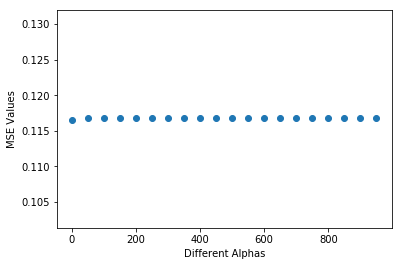

In [72]:
#Error graph for each alphas
plt.scatter(alphas_tfidf_multi,MSE)
plt.xlabel('Different Alphas')
plt.ylabel('MSE Values')
plt.show()

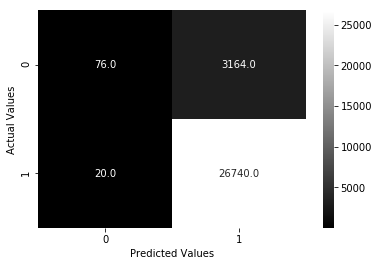

In [73]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_tfidf_multi = confusion_matrix(balanced_test_label,tfidf_predicted_vals_multi)
sns.heatmap(cnf_tfidf_multi,annot=True,cmap = plt.cm.gray,fmt=".1f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [74]:
#Finding the tnr,fnr,fpr,tpr
tnr_tfidf_multi = cnf_tfidf_multi[0,0]
fpr_tfidf_multi = cnf_tfidf_multi[0,1]
fnr_tfidf_multi = cnf_tfidf_multi[1,0]
tpr_tfidf_multi = cnf_tfidf_multi[1,1]
print("The True Negative rate is "+str(tnr_tfidf_multi))
print("The False Positive rate is "+str(fpr_tfidf_multi))
print("The False Negative rate is "+str(fnr_tfidf_multi))
print("The True Positive rate is "+str(tpr_tfidf_multi))

The True Negative rate is 76
The False Positive rate is 3164
The False Negative rate is 20
The True Positive rate is 26740


In [75]:
#Finding the precision,recall of the model
precision_tfidf_multi = tpr_tfidf_multi/(tpr_tfidf_multi+fpr_tfidf_multi)
recall_tfidf_multi = tpr_tfidf_multi/(fnr_tfidf_multi+tpr_tfidf_multi)
print("The precision of Tfidf Model is "+str(precision_tfidf_multi))
print("The recall of Tfidf Model is "+str(recall_tfidf_multi))

The precision of Tfidf Model is 0.8941947565543071
The recall of Tfidf Model is 0.9992526158445441


In [76]:
#Calculating the F1 Score
f1_score_tfidf_multi = (2*precision_tfidf_multi*recall_tfidf_multi)/(precision_tfidf_multi+recall_tfidf_multi)
print("The F1 Score of Tfidf Model is "+str(f1_score_tfidf_multi))

The F1 Score of Tfidf Model is 0.9438091204291966


# Conclusion
### 1. Multinomial Naive Bayes model with Tfidf Vectorizer predicted 26816 times correctly out of 30000 times
### 2. Accuracy of the model is 89.38666666666667%

# Summary

In [77]:
summary = {"Model":['Bag Of Words(Bernoulli)','Tfidf Vectorizer(Bernoulli)','Bag Of Words(Multinomial)','Tfidf Vectorizer(Multinomial)'],"Alpha":[str(optimal_alpha),str(optimal_alpha_tfidf),str(optimal_alpha_multi),str(optimal_alpha_tfidf_multi)],"Train Error":[str(100-score_t),str(100-score_tfidf_train),str(100-score_bow_multi_train),str(100-score_tfidf_train_multi)],"Test Error":[str(100-score),str(100-score_tfidf_test),str(100-score_bow_multi),str(100-score_tfidf_test_multi)],"F1 Score":[str(f1_score_bow),str(f1_score_tfidf),str(f1_score_bow_multi),str(f1_score_tfidf_multi)]}
summary_df = pd.DataFrame(summary)
summary_df

,Model,Alpha,Train Error,Test Error,F1 Score
0,Bag Of Words(Bernoulli),1,9.637142857142862,9.209999999999994,0.9490136738572826
1,Tfidf Vectorizer(Bernoulli),1,9.637142857142862,9.209999999999994,0.9490136738572826
2,Bag Of Words(Multinomial),1,7.598571428571432,7.260000000000005,0.9595753368721928
3,Tfidf Vectorizer(Multinomial),1,11.444285714285712,10.61333333333333,0.9438091204291966


## Bag Of Words with MultinomialNB performed best